#### Importing packages

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_csv(r"D:\Elevvo Internship tasks\Level 1\Task 7\walmart_cleaned.csv")
# Preview
df.head()


,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [3]:
df.columns


Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

 The rows are a presentation of weekly sales data of the store in a particular department. The columns contain information on the store number, the date on the record, the week of the year, store department, sales in the week, temperature, fuel price, various markdown discounts, consumer price index (CPI), rate of unemployment, type of the store and the size of the store. This preview will ensure you that the data was loaded properly and that it will provide you with the general idea of the variables you are going to analyze in your time series breakdown.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

#### Clean and prepare data

In [5]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort by date
df = df.sort_values('Date')

# Check for missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    421570 non-null  int64         
 1   Store         421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   IsHoliday     421570 non-null  int64         
 4   Dept          421570 non-null  float64       
 5   Weekly_Sales  421570 non-null  float64       
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  Type          421570 n

In [6]:
import pandas as pd

# Reload full data (replace with your file path)
# df = pd.read_csv("Walmart_Sales.csv")

# Drop unwanted index column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Convert Date safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure no rows are dropped
df = df.sort_values('Date')

# Verify structure again
print(df.shape)
print(df.info())


(421570, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   IsHoliday     421570 non-null  int64         
 3   Dept          421570 non-null  float64       
 4   Weekly_Sales  421570 non-null  float64       
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size     

All 421,570 records and 16 columns were kept, meaning no data was lost. The “Date” column was correctly changed into a date format so time-based analysis can be done easily. There are no missing values, and all columns have the correct data types numbers for sales and measurements, and integers for store information.

#### Aggregate total weekly sales

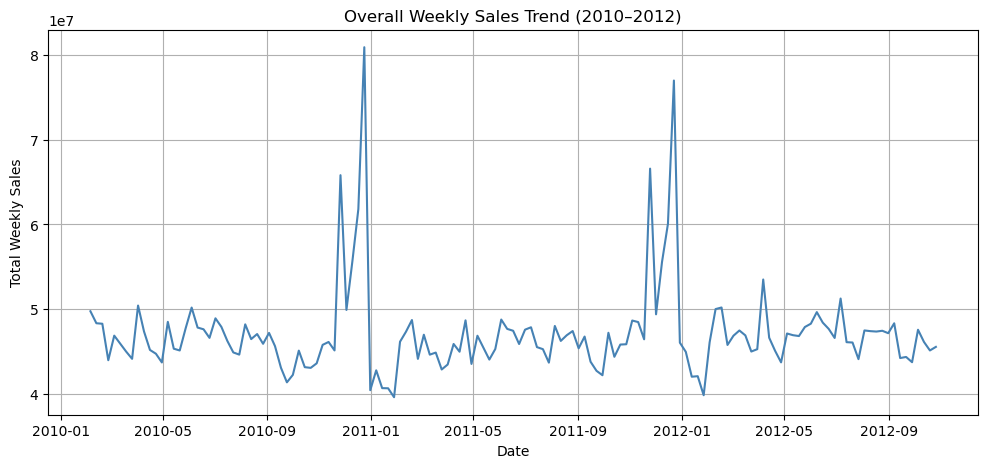

In [8]:
# Aggregate total weekly sales across all stores and departments
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot overall trend
plt.figure(figsize=(12, 5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], color='steelblue')
plt.title('Overall Weekly Sales Trend (2010–2012)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


This chart indicates the change in total weekly sales of Walmart between 2010 and 2012. This trend would increase and decrease as time goes on indicating that the sales changed at each week. The majority of the sales remained in 40 million (4e7) to 50 million dollars (5e7) as indicated on the vertical axis, and therefore sales remained relatively steady during most weeks. It has some sharp peaks towards the end of 2010 and the end of 2011 which are probably due to the holiday seasons like Thanksgiving or Christmas when sales tend to rise sharply. In general, there is a stable trend with some significant peaks around the time of intense shopping.

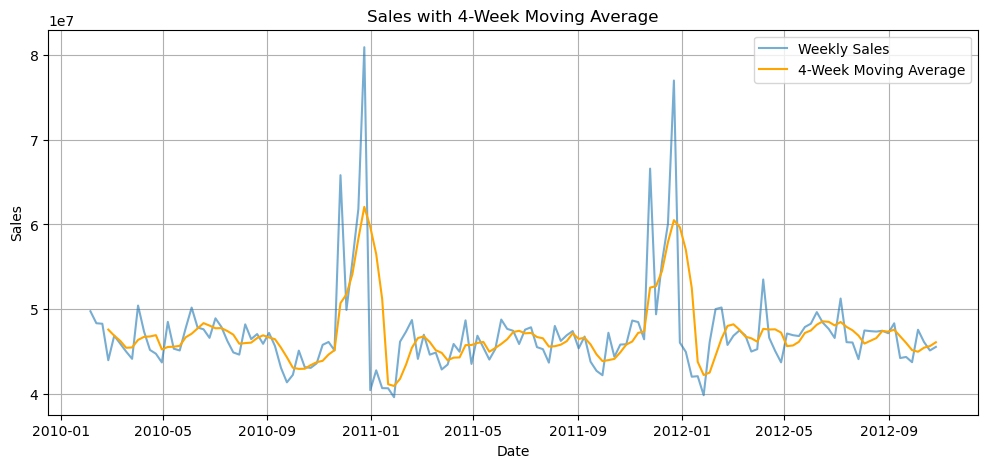

In [9]:
weekly_sales['MA_4'] = weekly_sales['Weekly_Sales'].rolling(window=4).mean()

plt.figure(figsize=(12, 5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Weekly Sales', alpha=0.6)
plt.plot(weekly_sales['Date'], weekly_sales['MA_4'], label='4-Week Moving Average', color='orange')
plt.title('Sales with 4-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


This graph shows Walmart’s total weekly sales (blue line) from 2010 to 2012 together with a 4-week moving average (orange line). The moving average smooths out short-term ups and downs, making it easier to see the overall pattern. Most weekly sales stay between about 40 million (4e7) and 50 million dollars (5e7), with big spikes around the end of each year—likely holiday seasons when shopping activity increases sharply. The orange line follows the same general shape but with fewer sharp peaks, showing the general upward and downward trends more clearly across the three years.

#### comparing top 5 scores

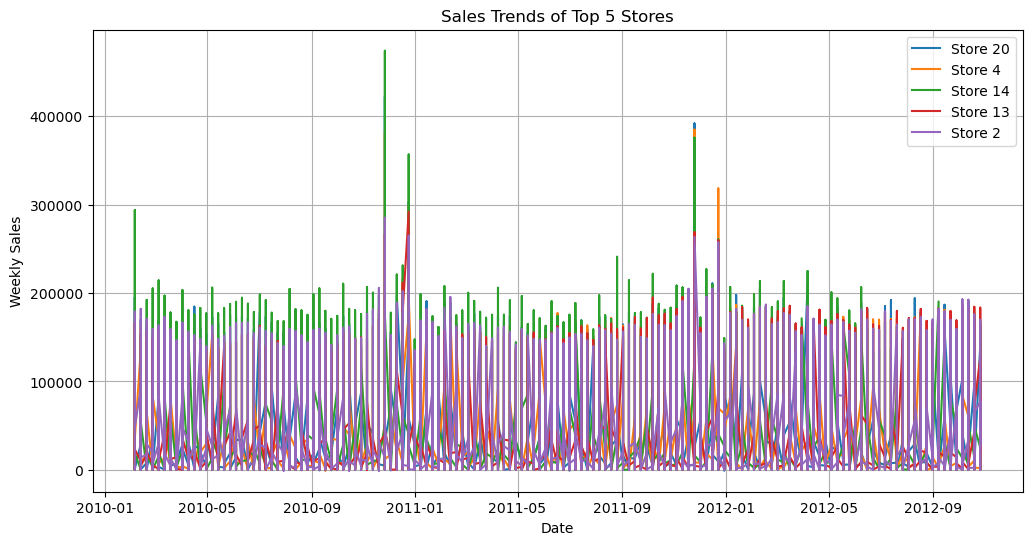

In [10]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5).index
store_sales = df[df['Store'].isin(top_stores)]

plt.figure(figsize=(12, 6))
for store in top_stores:
    store_data = store_sales[store_sales['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')

plt.title('Sales Trends of Top 5 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


This graph shows the weekly sales trends of Walmart’s top five stores (Stores 20, 4, 14, 13, and 2) from 2010 to 2012. Each colored line represents one store’s sales over time. You can see that all stores have frequent ups and downs each week, with a few large spikes where sales rise sharply — most likely during holiday periods or major promotions. Among them, Store 14 (green line) stands out with the highest sales peaks, reaching over 450,000 dollars in some weeks, showing it consistently performs better than the others. The other stores have lower and more stable sales levels, suggesting that while all top stores are strong performers, Store 14 likely generates the most revenue overall.

### holiday and non holiday sales

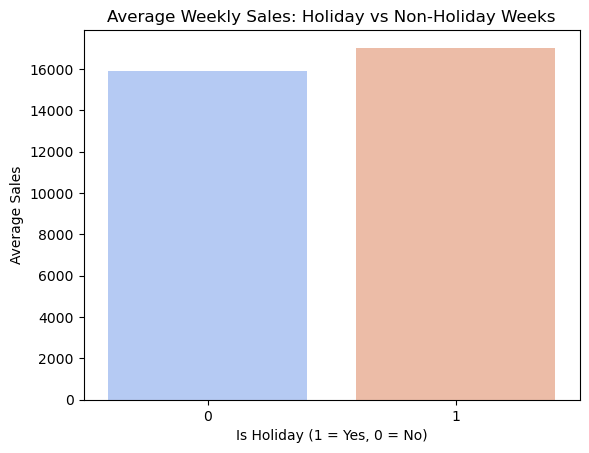

In [16]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales, palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday (1 = Yes, 0 = No)')
plt.ylabel('Average Sales')
plt.show()


This bar chart compares the average weekly sales during holiday weeks and non-holiday weeks. The bar for holiday weeks (1) is slightly higher than that for non-holiday weeks (0), showing that sales tend to increase during holidays. This makes sense because people usually shop more during major holidays like Thanksgiving or Christmas. Overall, the chart highlights that holidays have a positive effect on Walmart’s weekly sales, though the difference is moderate rather than extreme.

#### Seasonal Decomposition (Trend + Seasonality)

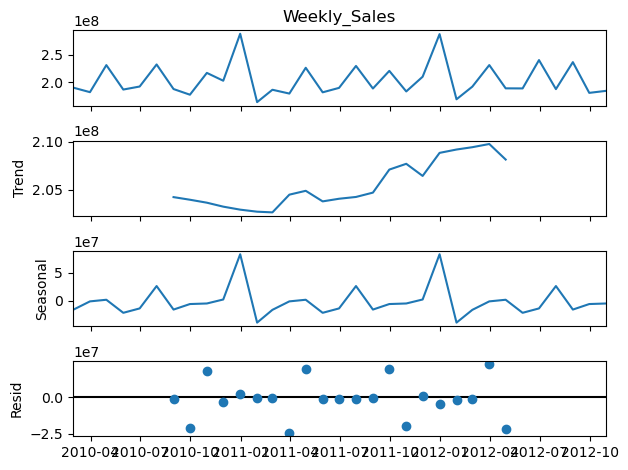

In [19]:
# Resample to monthly data
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()

# Perform seasonal decomposition
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.show()


In this chart, the sales of Walmart in a month are divided into four sections, including sales overall, trend, seasonality, and residual. The first line indicates that the sales increase and decrease periodically with definite peaks at the end of 2010 and 2011, presumably at the time of holidays. The trend line shows that there is a gradual rise in the total sales between 2010 and 2012 which shows a steady growth in business. The seasonal pattern indicates recurring patterns year after year implying that there are constant shopping trends over a period of some months of the year. The plot of the results gives a residual plot, which demonstrates minor irregular changes that cannot be attributed to trend or seasonality. The general trend observed in the graph is that the sales made by Walmart have been on a consistent upward trend over the years, with the rise and fall of several seasons being anticipated.

#### Sales Forecast using Exponential Smoothing

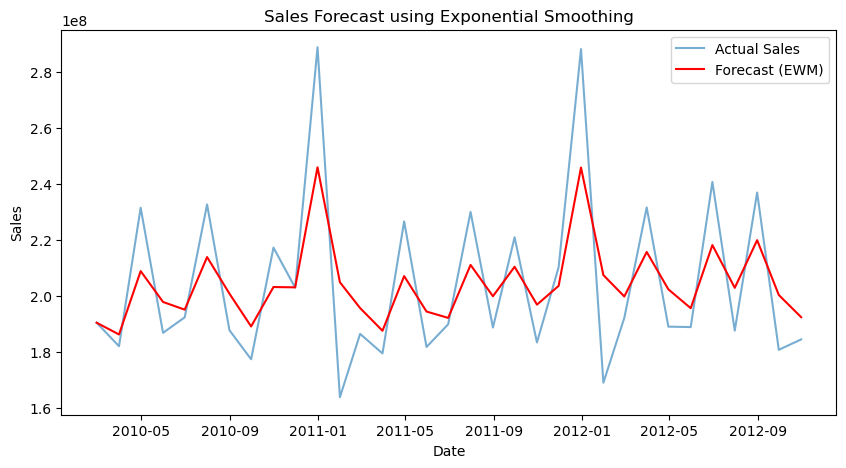

In [20]:
# Simple exponential smoothing
monthly_sales = monthly_sales.reset_index()
monthly_sales['Forecast'] = monthly_sales['Weekly_Sales'].ewm(span=3, adjust=False).mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label='Actual Sales', alpha=0.6)
plt.plot(monthly_sales['Date'], monthly_sales['Forecast'], label='Forecast (EWM)', color='red')
plt.title('Sales Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


This graph illustrates the actual sales of Walmart on a monthly basis (blue line) and the forecast that was prepared using exponential smoothing (red line). The red line averages the short-term variation in order to present the long-term trend in a better way. It is in the overall trend of real sales but with less drastic peaks and drastic falls. Although the prediction slightly trails the sharp rises like the drastic increases around the end of 2010 and 2011 that it features it represents the overall trend of the sales with time. This implies that exponential smoothing is reasonable when making short term prediction as it focuses on the recent sales trends.